In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
train_data_dir = 'cifar-10-img/train'
test_data_dir = 'cifar-10-img/test'

In [3]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 20000
test_batch_size = 2000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during testing
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [4]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [5]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (20000, 32, 32, 3)
Shape of y_train (20000, 10)
Shape of x_test  (2000, 32, 32, 3)
Shape of y_test  (2000, 10)


In [6]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
x_train.shape[1:]

(32, 32, 3)

In [8]:
# Create a list of layers
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/Users/amuzz/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,962 (2.42 MB)

 Trainable params: 633,450 (2.42 MB)

 Non-trainable params: 512 (2.00 KB)

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3224 - loss: 1.8976 - val_accuracy: 0.4955 - val_loss: 1.4304
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.5115 - loss: 1.3583 - val_accuracy: 0.5670 - val_loss: 1.2029
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5825 - loss: 1.1721 - val_accuracy: 0.5905 - val_loss: 1.1526
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.6460 - loss: 1.0024 - val_accuracy: 0.6255 - val_loss: 1.0725
Epoch 5/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6870 - loss: 0.9037 - val_accuracy: 0.6210 - val_loss: 1.0523


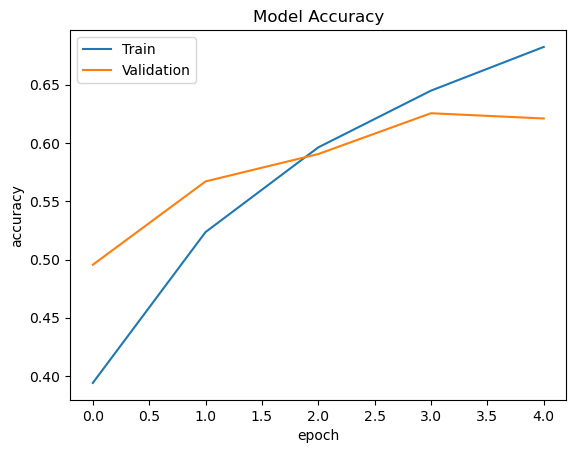

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

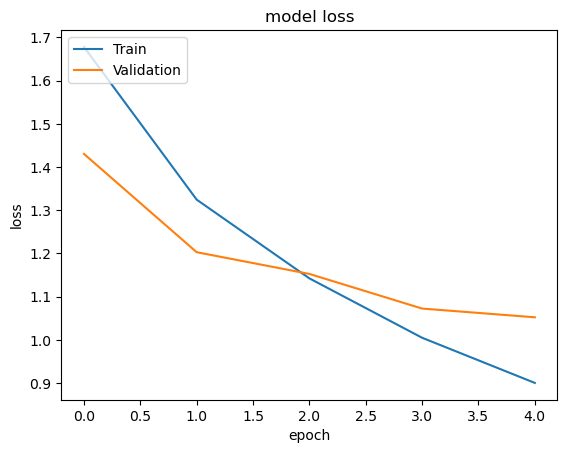

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6317 - loss: 1.0153
Loss:  1.0522851943969727
Accuracy:  0.6209999918937683


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


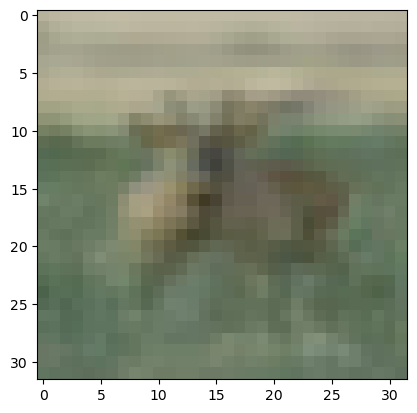

deer


In [13]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[20])
plt.show()
print(class_names[np.argmax(predicted_value[20], axis=0)])